In [1]:
import sys
import os
import numpy as np
import MDAnalysis as mda
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import path

In [2]:
cur_path1 = os.getcwd()
print(cur_path1)

C:\Users\pcuser\Desktop\tutorial\AFP\lp\bias\8A\qbar6


In [3]:
q_star_arr = ["100", "200", "300", "400", "500", "600", "700", "800", "900", "1000", "1100", "1200", "1300", "1400" ]

In [4]:
file_name='IPS_density_0.5.txt'

In [7]:
icy_q_star_arr = []
icy_heavy_atoms = []
for i in q_star_arr[:-1]:
    work_path = cur_path1 + "\\" +i
    os.chdir(work_path)
    
    if path.exists(file_name):
        icy_q_star_arr += [i]
        df = open(file_name,"r+")
        
        heavy_atoms = []
        for line in df.readlines():
            heavy_atoms += [line[:-1]]
        heavy_atoms = np.array(heavy_atoms, dtype=int)
        icy_heavy_atoms += [heavy_atoms]
IPS = icy_heavy_atoms

In [8]:
IPS

[array([ 820, 1013, 1014, 1042, 1193, 1197, 1221]),
 array([ 286,  290,  299,  300,  387,  390,  475,  478,  490,  572,  575,
         578,  595,  670,  672,  684,  755,  758,  760,  764,  946,  954,
         960,  964, 1107, 1130, 1135, 1138, 1142, 1144, 1147, 1280, 1284,
        1303, 1308, 1311, 1315]),
 array([  85,   88,  101,  254,  278,  284,  286,  290,  299,  300,  313,
         314,  472,  475,  478,  490,  498,  501,  502,  503,  632,  655,
         660,  662,  666,  670,  672,  684,  696,  697,  820,  827,  848,
         853,  855,  859,  863,  871,  872,  883,  884,  897,  898,  954,
        1013, 1014, 1042, 1048, 1052, 1060, 1076, 1078, 1130, 1135, 1138,
        1142, 1144, 1147, 1193, 1197, 1221, 1224, 1228, 1230, 1303, 1308,
        1311, 1315, 1370, 1400, 1403]),
 array([  36,   40,   43,   67,   70,  210,  224,  245,  249,  254,  273,
         278,  284,  286,  299,  316,  341,  374,  418,  419,  423,  437,
         442,  445,  472,  475,  478,  490,  498,  501,  502

In [9]:
icy_q_star_arr

['500', '600', '700', '800', '900', '1000', '1100', '1200', '1300']

In [10]:
#get surface atom's position
# surface_pos is the key

os.chdir(cur_path1)
IBS_txt = "IBS_density_0.5.txt"

sf = open(IBS_txt, "r+")
IBS = []
for line in sf.readlines():
    IBS += [np.int(line)]
IBS = np.array(IBS)

print(IBS)
print(len(IBS))

[ 254  437  442  445  472  632  655  660  662  666  813  820  827  848
  853  855 1013 1014 1042 1052]
20


In [11]:
#For TP
TP = []
FN = []
FP = []
TN = []
for i in range(len(icy_q_star_arr)):
    IPS_i = IPS[i]
    TP += [len(np.intersect1d(IPS_i,IBS))]
    FN += [len(np.setdiff1d(IBS, IPS_i))]
    FP += [len(np.setdiff1d(IPS_i, IBS))]
    
    combined = np.append(IPS_i, np.setdiff1d(IBS, IPS_i))
    TN += [len(IPS[-1])- len(combined)]

TP = np.array(TP)
FN = np.array(FN)
FP = np.array(FP)
TN = np.array(TN)

In [12]:
TPR = TP/(TP+FN)
print(TPR)

[0.2  0.   0.8  0.95 0.85 0.65 1.   0.95 1.  ]


In [13]:
FPR = FP/(FP+TN)
print(FPR)

[0.01363636 0.16818182 0.25       0.44545455 0.6        0.75
 0.79545455 0.92272727 1.        ]


0.7077272727272728


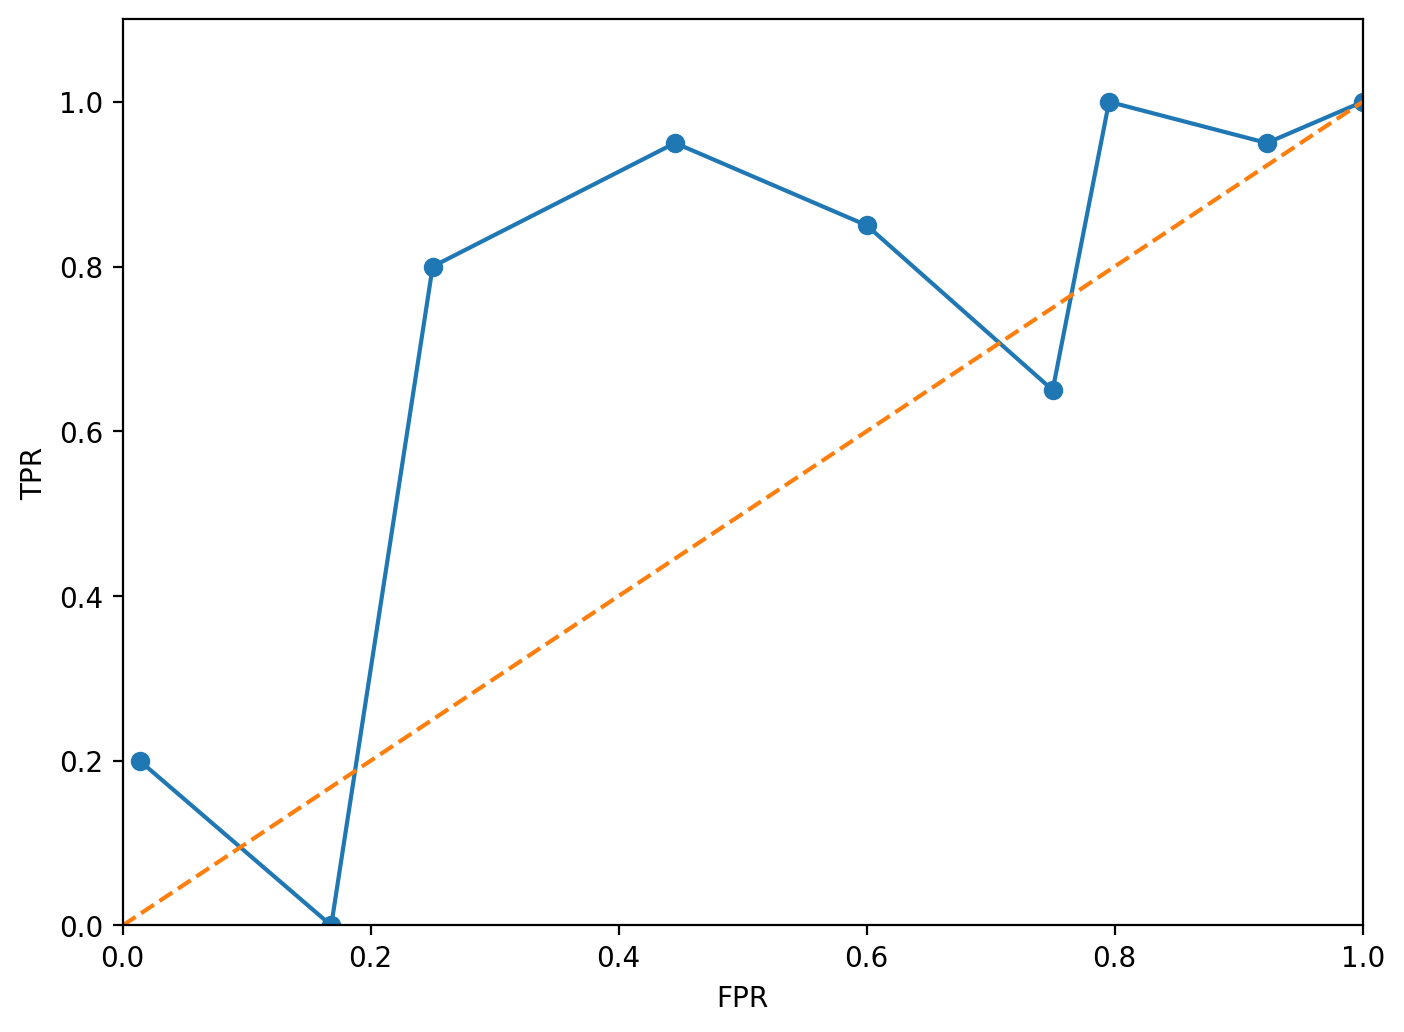

In [14]:
figure(figsize=(8,6), dpi=200)

plt.plot(FPR,TPR, marker='o')
xx = [0,1]
plt.plot(xx,xx,'--')
plt.ylim(0,1.1)
plt.xlim(0,1)

plt.ylabel('TPR', fontsize=10)
plt.xlabel('FPR', fontsize=10)

AUC = 0

with np.errstate(divide='ignore'):
    for i in range(len(TPR)-1):
        AUC += ((TPR[i+1])+(TPR[i]))/2*((FPR[i+1])-(FPR[i]))
#         print(AUC)
#     print(AUC)
print(AUC)



In [15]:
TPR

array([0.2 , 0.  , 0.8 , 0.95, 0.85, 0.65, 1.  , 0.95, 1.  ])

<ipython-input-16-4fdb0e93ac59>:3: RuntimeWarning: divide by zero encountered in true_divide
  dh = 2/(1/TPR + 1/(1-FPR))


[0.33256705 0.         0.77419355 0.70030211 0.544      0.36111111
 0.33962264 0.14292035 0.        ]
0.7741935483870969


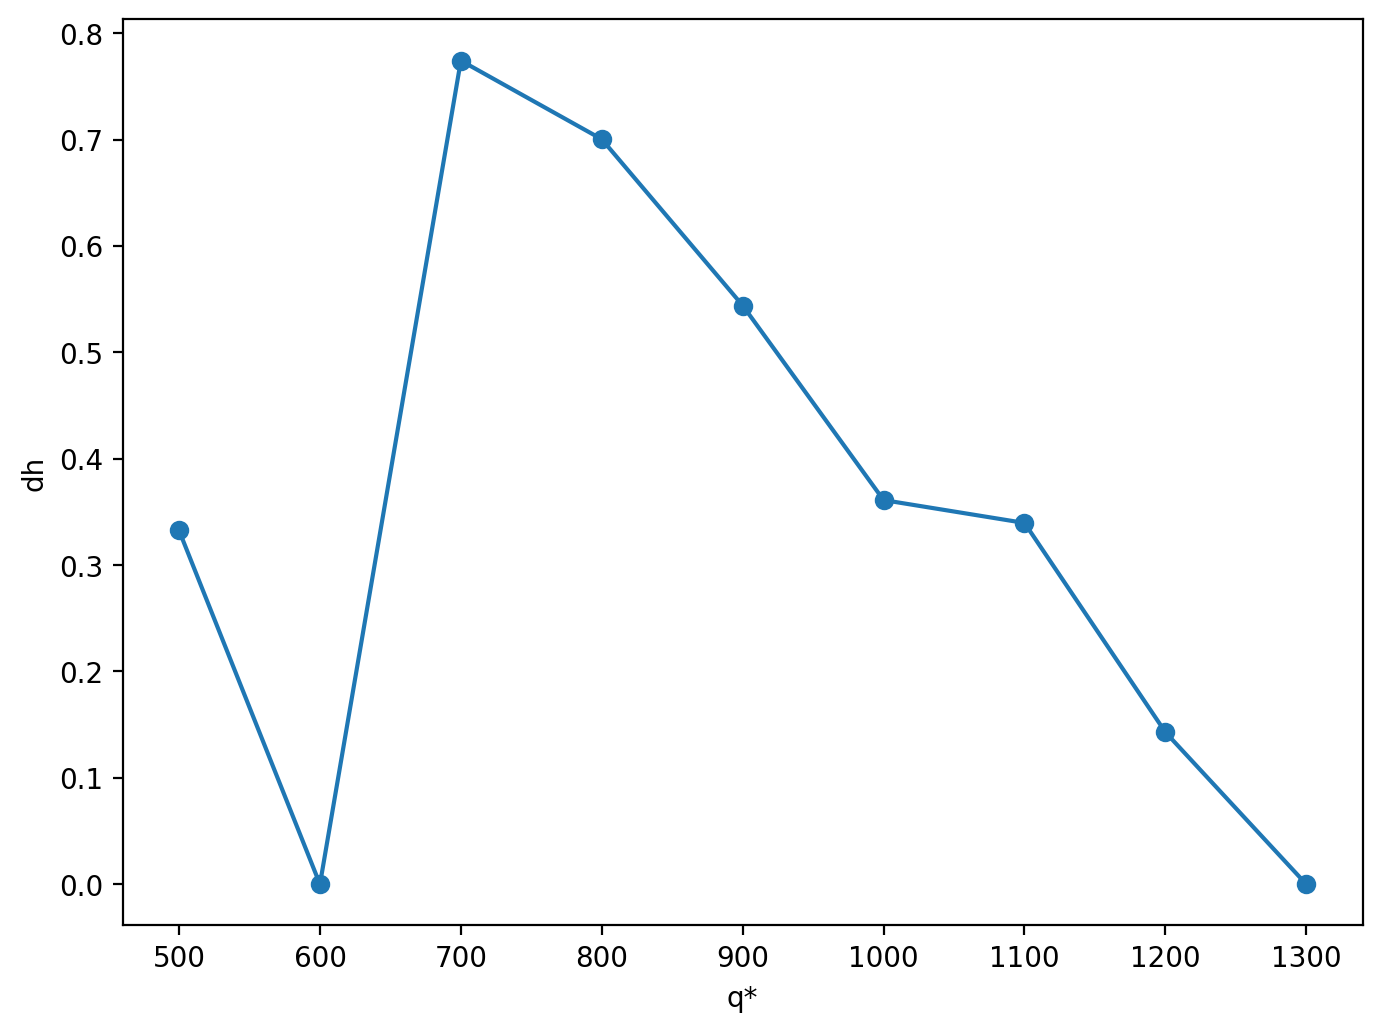

In [16]:
figure(figsize=(8,6), dpi=200)

dh = 2/(1/TPR + 1/(1-FPR))
plt.plot(icy_q_star_arr,dh, marker='o')
plt.xlabel('q*' , fontsize=10)
plt.ylabel('dh', fontsize=10)
print(dh)
print(max(dh))

Text(0.5, 0, 'q*')

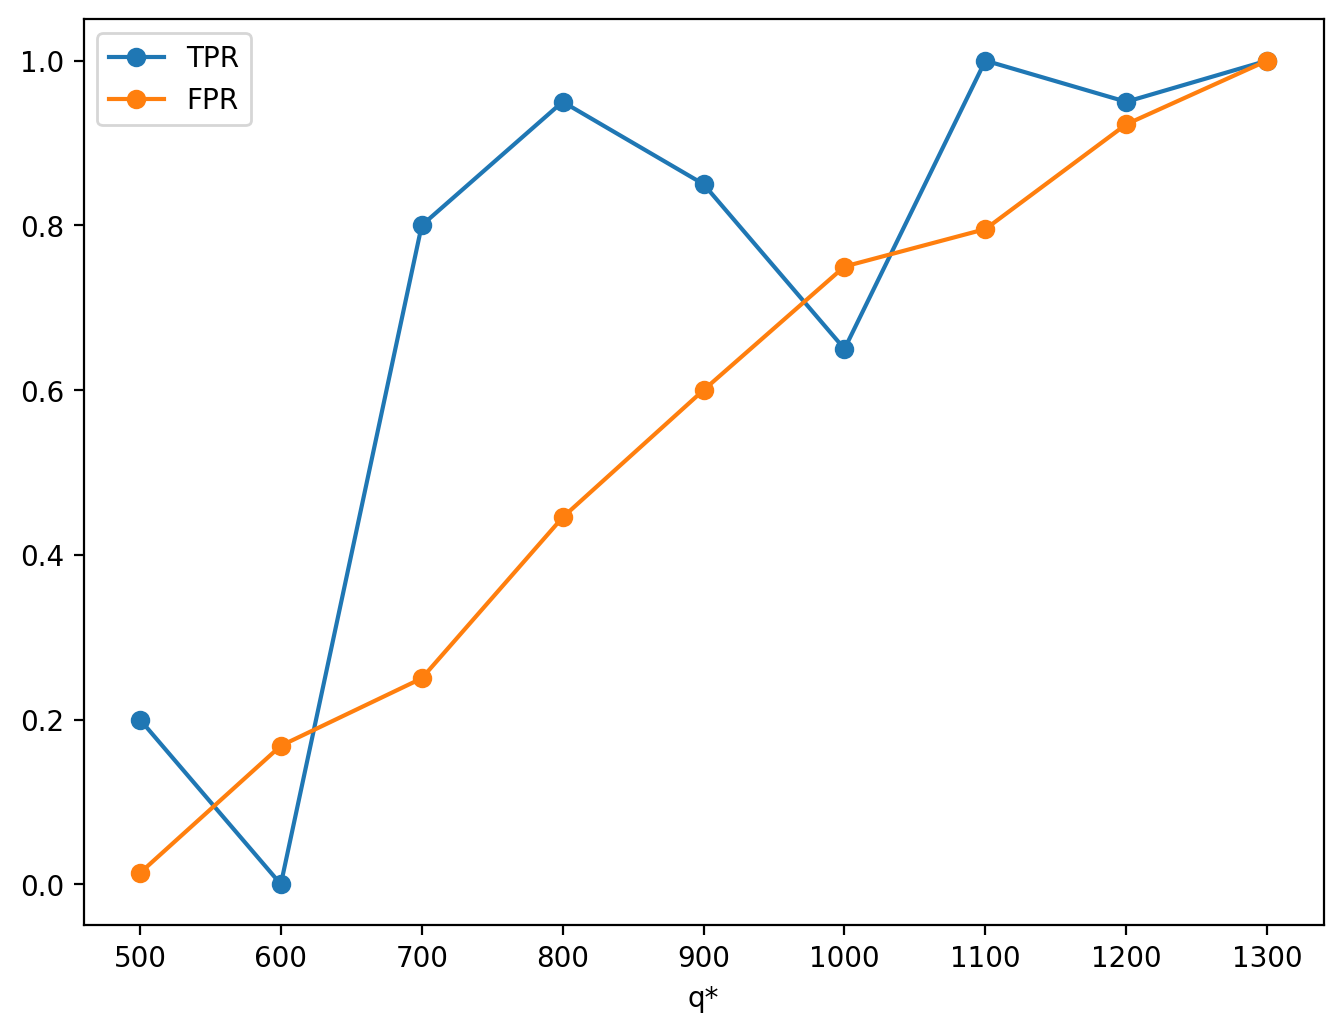

In [17]:
icy_q_star_arr_acr = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
figure(figsize=(8,6), dpi=200)

plt.plot(icy_q_star_arr, TPR, marker='o')
plt.plot(icy_q_star_arr, FPR, marker='o')
plt.legend(['TPR','FPR'])

plt.xlabel('q*')

In [99]:
FP

array([  3,   7,  21,  33,  46,  62,  74,  87, 103, 117, 148, 164, 164,
       164, 164, 164])

In [100]:
TN

array([ 27,  31,  45,  57,  70,  86,  98, 111, 127, 141, 172, 188, 188,
       188, 188, 188])

In [101]:
len(IPS[-1])

188